# Term Project

### import & Version Check

In [1]:
import keras
import tensorflow as tf
import os
import numpy as np

print(f"Keras Version : {keras.__version__}")
print(f"Tensorflow Version : {tf.__version__}")
print(f"GPU : {tf.test.is_gpu_available()}")

Keras Version : 2.8.0
Tensorflow Version : 2.8.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU : True


### 파일 이름 바꾸기

kaggle에서 받아온 파일들의 이름을 정리하기 위한 코드. 모두 숫자로 아래와 같이 바꿔준다.

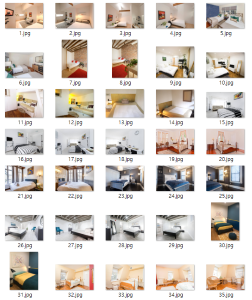

In [ ]:
import os

file_path = './Dataset/Training_Data/'
file_names = os.listdir(file_path)
print(file_names)
file_length = len(file_names)

In [ ]:
i = 366
for name in file_names:
    src = os.path.join(file_path, name)
    dst = str(i) + '.jpg'
    dst = os.path.join(file_path, dst)
    os.rename(src, dst)
    i += 1

### Image 불러오기 및 확인

In [ ]:
file_path = './Dataset/Training_Data_style/'
file_names = os.listdir(file_path)
print(file_names)
file_length = len(file_names)

In [ ]:
from keras.preprocessing import image

img_data = []
print(f"file length = {file_length}")

for i in range(1,5):

    img_path = './Dataset/Training_Data_style/' + "casual_" + str(i) + '.jpg'
    img_data.append(image.load_img(img_path, target_size=(150,150)))

img_count = len(img_data)
print(f"image number is {img_count}")

In [ ]:
print(img_data.shape)

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img_data[0])
plt.show()

### Image Dataset .npy 파일로 바꾸기 (데이터 다루기 용이함)

In [ ]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

groups_folder_path = './Dataset/Training_Data_style'
categories = ["casual_", "modern_", "classic_", "natural_"]

print(len(categories))
nb_classes = len(categories) #카테고리갯수: 4개

image_w = 75 #이미지의 크기를 모두 통일해준다
image_h = 75

In [ ]:
X = []
Y = []

file_path = './Dataset/Training_Data_style/'
file_names = os.listdir(file_path)
file_length = len(file_names)

for idx, cate in enumerate(categories):
    for num in range(1, file_length + 1):
        
        image_dir = groups_folder_path + "/" + cate + str(num)
        files = glob.glob(image_dir+".jpg")
        print(cate+str(num), " 파일 길이 : ", len(files))
        for i, f in enumerate(files):
            img = Image.open(f)      #폴더를 열어주고 이미지를 읽음
            img = img.convert("RGB")   #RGB로 바꿈
            img = img.resize((image_w, image_h)) #이미지 크기를 모두 학습시키기 쉽게 64x64크기고
            data = np.asarray(img) #숫자로

            X.append(data) #리스트에 추가 
            Y.append(cate)


X = np.array(X)
Y = np.array(Y)
#1 0 0 0 
#0 1 0 0 
print(Y)

# X_train, X_test, y_train, y_test = train_test_split(X, y) #데이터를 훈련셋과 시험셋으로 나눠주는 함수이용
# xy = (X_train, X_test, y_train, y_test)
np.save("./Dataset/Training_Data_style/image_data_style", X) #그렇게 xy를 multi_image_data.npy로 저장
np.save("./Dataset/Training_Data_style/image_label_style", Y) #그렇게 xy를 multi_image_data.npy로 저장

print(".npy file is created.", len(Y))

### 생성한 .npy 불러오고 확인하기 - (Style)

In [2]:
train_images_style = np.load("./Dataset/Training_Data_style/image_data_style.npy", allow_pickle=True)
train_labels_style = np.load("./Dataset/Training_Data_style/image_label_style.npy", allow_pickle=True)

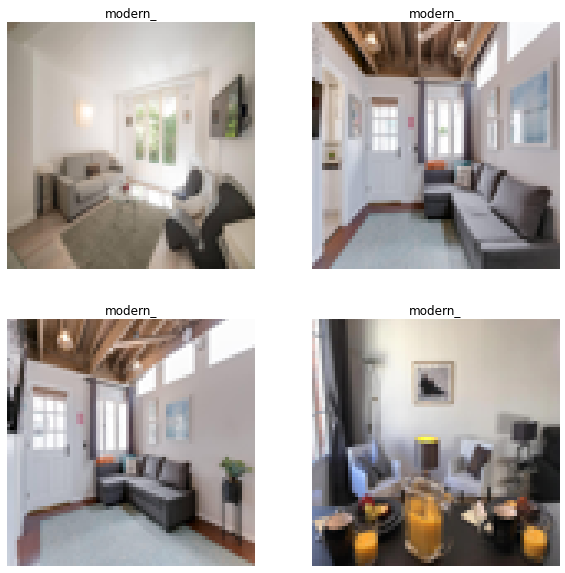

In [3]:
import matplotlib.pyplot as plt

def draw_img(train_images, train_labels,image_offset =1000):
    data_size = train_images.shape[0]
    if image_offset>= data_size-4:
        image_offset =data_size-4
    fig = plt.figure()
    fig.set_size_inches(10, 10, forward=True)
    rows=2
    cols=2

    for i in range(4):
        ax = fig.add_subplot(rows,cols,i+1)
        ax.imshow(train_images[image_offset+i])
        ax.set_title(train_labels[image_offset+i])
        ax.axis("off")

draw_img(train_images_style, train_labels_style, image_offset = 400)

In [4]:
train_size = train_images_style.shape[0]
print("train data size is ", train_size)

train_images_style = train_images_style.reshape(train_size, 75, 75,3)
print(train_images_style.shape)
train_images_style = train_images_style / 255.0

train data size is  556
(556, 75, 75, 3)


### Data Augmentation

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
                                    rotation_range=20, 
                                    zoom_range=0.2, 
                                    shear_range=0.7, 
                                    width_shift_range=0.2, 
                                    height_shift_range=0.2, 
                                    horizontal_flip=True, 
                                    vertical_flip=False)

Images after Augmentation :  3556
(75, 75, 3)


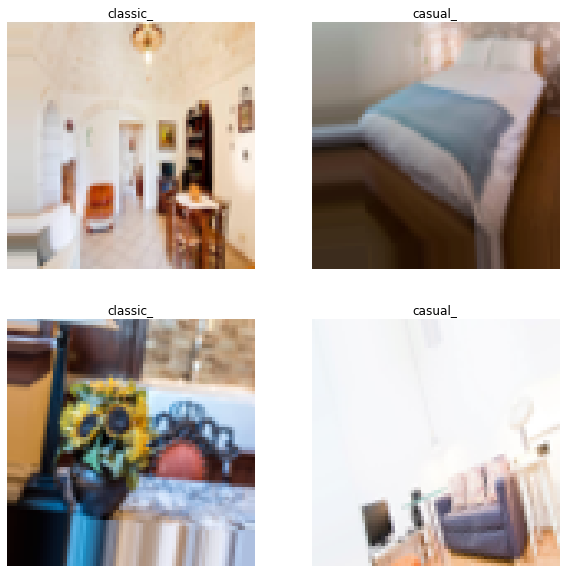

In [6]:
augment_size = 3000

rand_idx2 = np.random.randint(train_images_style.shape[0], size=augment_size)
x_augmented = train_images_style[rand_idx2].copy()
y_augmented = train_labels_style[rand_idx2].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

# original data + augmented data
aug_train_images_style = np.concatenate((train_images_style, x_augmented))
aug_train_labels_style = np.concatenate((train_labels_style, y_augmented))

print('Images after Augmentation : ', aug_train_images_style.shape[0])

assert aug_train_images_style.shape[0]==train_images_style.shape[0] + augment_size
assert aug_train_labels_style.shape[0]==train_labels_style.shape[0] + augment_size

index = 2500
data_size = aug_train_images_style.shape[0]
if index>= data_size-4:
    index =data_size-4
fig = plt.figure()
fig.set_size_inches(10, 10, forward=True)
rows=2
cols=2
print(aug_train_images_style[index].shape)
for i in range(4):
    ax = fig.add_subplot(rows,cols,i+1)
    ax.imshow((aug_train_images_style[index+i]*255).astype('uint8'))
    ax.set_title(aug_train_labels_style[index+i])
    ax.axis("off")

### One-hot Encoding

In [7]:
from sklearn.preprocessing import OneHotEncoder
enc= OneHotEncoder()
train_labels_new_style = aug_train_labels_style.reshape(-1,1)
enc.fit(train_labels_new_style)

#changed the names through one-hot encoding.
aug_train_labels_style_onehot = np.array(enc.transform(train_labels_new_style).toarray())

print("one-hot encoding train shape is ", aug_train_labels_style_onehot.shape)
print(aug_train_labels_style_onehot)

print(aug_train_images_style.shape[0])
aug_train_labels_style_onehot = aug_train_labels_style_onehot.reshape(aug_train_images_style.shape[0], 1, 1, 4)

one-hot encoding train shape is  (3556, 4)
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
3556


### My Train Layer

In [8]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras import layers


base_model = InceptionResNetV2(include_top=False,
                               weights='imagenet',
                               input_tensor=None,
                               input_shape=(75,75,3))
outputs = layers.Dense(4, activation='softmax')(base_model.output)

model = tf.keras.Model(base_model.input, outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 37, 37, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 37, 37, 32)   0           ['batch_normalization[0][0]']

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 7, 7, 64)    192         ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 7, 7, 96)     0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 7, 7, 64)     0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activation_10 (Activation)     (None, 7, 7, 96)     0           ['batch_normalization_10[0][0]'] 
          

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_22 (BatchN  (None, 7, 7, 48)    144         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_19 (Activation)     (None, 7, 7, 32)     0           ['batch_normalization_19[0][0]'] 
                                                                                                  
 activation_22 (Activation)     (None, 7, 7, 48)     0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_18 (Conv2D)             (None, 7, 7, 32)     10240       ['block35_1_ac[0][0]']           
          

 block35_3_mixed (Concatenate)  (None, 7, 7, 128)    0           ['activation_24[0][0]',          
                                                                  'activation_26[0][0]',          
                                                                  'activation_29[0][0]']          
                                                                                                  
 block35_3_conv (Conv2D)        (None, 7, 7, 320)    41280       ['block35_3_mixed[0][0]']        
                                                                                                  
 block35_3 (Lambda)             (None, 7, 7, 320)    0           ['block35_2_ac[0][0]',           
                                                                  'block35_3_conv[0][0]']         
                                                                                                  
 block35_3_ac (Activation)      (None, 7, 7, 320)    0           ['block35_3[0][0]']              
          

 activation_40 (Activation)     (None, 7, 7, 48)     0           ['batch_normalization_40[0][0]'] 
                                                                                                  
 conv2d_36 (Conv2D)             (None, 7, 7, 32)     10240       ['block35_4_ac[0][0]']           
                                                                                                  
 conv2d_38 (Conv2D)             (None, 7, 7, 32)     9216        ['activation_37[0][0]']          
                                                                                                  
 conv2d_41 (Conv2D)             (None, 7, 7, 64)     27648       ['activation_40[0][0]']          
                                                                                                  
 batch_normalization_36 (BatchN  (None, 7, 7, 32)    96          ['conv2d_36[0][0]']              
 ormalization)                                                                                    
          

                                                                  'block35_6_conv[0][0]']         
                                                                                                  
 block35_6_ac (Activation)      (None, 7, 7, 320)    0           ['block35_6[0][0]']              
                                                                                                  
 conv2d_51 (Conv2D)             (None, 7, 7, 32)     10240       ['block35_6_ac[0][0]']           
                                                                                                  
 batch_normalization_51 (BatchN  (None, 7, 7, 32)    96          ['conv2d_51[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_51 (Activation)     (None, 7, 7, 32)     0           ['batch_normalization_51[0][0]'] 
          

                                                                                                  
 batch_normalization_54 (BatchN  (None, 7, 7, 32)    96          ['conv2d_54[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_56 (BatchN  (None, 7, 7, 32)    96          ['conv2d_56[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_59 (BatchN  (None, 7, 7, 64)    192         ['conv2d_59[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 activation_69 (Activation)     (None, 7, 7, 32)     0           ['batch_normalization_69[0][0]'] 
                                                                                                  
 conv2d_67 (Conv2D)             (None, 7, 7, 32)     10240       ['block35_9_ac[0][0]']           
                                                                                                  
 conv2d_70 (Conv2D)             (None, 7, 7, 48)     13824       ['activation_69[0][0]']          
                                                                                                  
 batch_normalization_67 (BatchN  (None, 7, 7, 32)    96          ['conv2d_67[0][0]']              
 ormalization)                                                                                    
          

                                                                                                  
 conv2d_77 (Conv2D)             (None, 3, 3, 128)    139264      ['mixed_6a[0][0]']               
                                                                                                  
 batch_normalization_77 (BatchN  (None, 3, 3, 128)   384         ['conv2d_77[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_77 (Activation)     (None, 3, 3, 128)    0           ['batch_normalization_77[0][0]'] 
                                                                                                  
 conv2d_78 (Conv2D)             (None, 3, 3, 160)    143360      ['activation_77[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_86 (Conv2D)             (None, 3, 3, 160)    143360      ['activation_85[0][0]']          
                                                                                                  
 batch_normalization_86 (BatchN  (None, 3, 3, 160)   480         ['conv2d_86[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_86 (Activation)     (None, 3, 3, 160)    0           ['batch_normalization_86[0][0]'] 
                                                                                                  
 conv2d_84 (Conv2D)             (None, 3, 3, 192)    208896      ['block17_2_ac[0][0]']           
                                                                                                  
 conv2d_87

                                                                                                  
 conv2d_92 (Conv2D)             (None, 3, 3, 192)    208896      ['block17_4_ac[0][0]']           
                                                                                                  
 conv2d_95 (Conv2D)             (None, 3, 3, 192)    215040      ['activation_94[0][0]']          
                                                                                                  
 batch_normalization_92 (BatchN  (None, 3, 3, 192)   576         ['conv2d_92[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_95 (BatchN  (None, 3, 3, 192)   576         ['conv2d_95[0][0]']              
 ormalization)                                                                                    
          

                                                                                                  
 batch_normalization_103 (Batch  (None, 3, 3, 192)   576         ['conv2d_103[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_100 (Activation)    (None, 3, 3, 192)    0           ['batch_normalization_100[0][0]']
                                                                                                  
 activation_103 (Activation)    (None, 3, 3, 192)    0           ['batch_normalization_103[0][0]']
                                                                                                  
 block17_7_mixed (Concatenate)  (None, 3, 3, 384)    0           ['activation_100[0][0]',         
                                                                  'activation_103[0][0]']         
          

                                                                                                  
 block17_9_mixed (Concatenate)  (None, 3, 3, 384)    0           ['activation_108[0][0]',         
                                                                  'activation_111[0][0]']         
                                                                                                  
 block17_9_conv (Conv2D)        (None, 3, 3, 1088)   418880      ['block17_9_mixed[0][0]']        
                                                                                                  
 block17_9 (Lambda)             (None, 3, 3, 1088)   0           ['block17_8_ac[0][0]',           
                                                                  'block17_9_conv[0][0]']         
                                                                                                  
 block17_9_ac (Activation)      (None, 3, 3, 1088)   0           ['block17_9[0][0]']              
          

                                                                  'block17_11_conv[0][0]']        
                                                                                                  
 block17_11_ac (Activation)     (None, 3, 3, 1088)   0           ['block17_11[0][0]']             
                                                                                                  
 conv2d_121 (Conv2D)            (None, 3, 3, 128)    139264      ['block17_11_ac[0][0]']          
                                                                                                  
 batch_normalization_121 (Batch  (None, 3, 3, 128)   384         ['conv2d_121[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_121 (Activation)    (None, 3, 3, 128)    0           ['batch_normalization_121[0][0]']
          

 Normalization)                                                                                   
                                                                                                  
 activation_129 (Activation)    (None, 3, 3, 128)    0           ['batch_normalization_129[0][0]']
                                                                                                  
 conv2d_130 (Conv2D)            (None, 3, 3, 160)    143360      ['activation_129[0][0]']         
                                                                                                  
 batch_normalization_130 (Batch  (None, 3, 3, 160)   480         ['conv2d_130[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_130 (Activation)    (None, 3, 3, 160)    0           ['batch_normalization_130[0][0]']
          

 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 3, 3, 160)    0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_136 (Conv2D)            (None, 3, 3, 192)    208896      ['block17_15_ac[0][0]']          
                                                                                                  
 conv2d_139 (Conv2D)            (None, 3, 3, 192)    215040      ['activation_138[0][0]']         
                                                                                                  
 batch_normalization_136 (Batch  (None, 3, 3, 192)   576         ['conv2d_136[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 batch_normalization_144 (Batch  (None, 3, 3, 192)   576         ['conv2d_144[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_147 (Batch  (None, 3, 3, 192)   576         ['conv2d_147[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_144 (Activation)    (None, 3, 3, 192)    0           ['batch_normalization_144[0][0]']
                                                                                                  
 activation_147 (Activation)    (None, 3, 3, 192)    0           ['batch_normalization_147[0][0]']
          

 activation_152 (Activation)    (None, 3, 3, 192)    0           ['batch_normalization_152[0][0]']
                                                                                                  
 activation_155 (Activation)    (None, 3, 3, 192)    0           ['batch_normalization_155[0][0]']
                                                                                                  
 block17_20_mixed (Concatenate)  (None, 3, 3, 384)   0           ['activation_152[0][0]',         
                                                                  'activation_155[0][0]']         
                                                                                                  
 block17_20_conv (Conv2D)       (None, 3, 3, 1088)   418880      ['block17_20_mixed[0][0]']       
                                                                                                  
 block17_20 (Lambda)            (None, 3, 3, 1088)   0           ['block17_19_ac[0][0]',          
          

                                                                                                  
 conv2d_163 (Conv2D)            (None, 1, 1, 192)    399360      ['mixed_7a[0][0]']               
                                                                                                  
 conv2d_166 (Conv2D)            (None, 1, 1, 256)    172032      ['activation_165[0][0]']         
                                                                                                  
 batch_normalization_163 (Batch  (None, 1, 1, 192)   576         ['conv2d_163[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_166 (Batch  (None, 1, 1, 256)   768         ['conv2d_166[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 batch_normalization_174 (Batch  (None, 1, 1, 256)   768         ['conv2d_174[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_171 (Activation)    (None, 1, 1, 192)    0           ['batch_normalization_171[0][0]']
                                                                                                  
 activation_174 (Activation)    (None, 1, 1, 256)    0           ['batch_normalization_174[0][0]']
                                                                                                  
 block8_3_mixed (Concatenate)   (None, 1, 1, 448)    0           ['activation_171[0][0]',         
                                                                  'activation_174[0][0]']         
          

                                                                                                  
 block8_5_mixed (Concatenate)   (None, 1, 1, 448)    0           ['activation_179[0][0]',         
                                                                  'activation_182[0][0]']         
                                                                                                  
 block8_5_conv (Conv2D)         (None, 1, 1, 2080)   933920      ['block8_5_mixed[0][0]']         
                                                                                                  
 block8_5 (Lambda)              (None, 1, 1, 2080)   0           ['block8_4_ac[0][0]',            
                                                                  'block8_5_conv[0][0]']          
                                                                                                  
 block8_5_ac (Activation)       (None, 1, 1, 2080)   0           ['block8_5[0][0]']               
          

                                                                  'block8_7_conv[0][0]']          
                                                                                                  
 block8_7_ac (Activation)       (None, 1, 1, 2080)   0           ['block8_7[0][0]']               
                                                                                                  
 conv2d_192 (Conv2D)            (None, 1, 1, 192)    399360      ['block8_7_ac[0][0]']            
                                                                                                  
 batch_normalization_192 (Batch  (None, 1, 1, 192)   576         ['conv2d_192[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_192 (Activation)    (None, 1, 1, 192)    0           ['batch_normalization_192[0][0]']
          

 Normalization)                                                                                   
                                                                                                  
 activation_200 (Activation)    (None, 1, 1, 192)    0           ['batch_normalization_200[0][0]']
                                                                                                  
 conv2d_201 (Conv2D)            (None, 1, 1, 224)    129024      ['activation_200[0][0]']         
                                                                                                  
 batch_normalization_201 (Batch  (None, 1, 1, 224)   672         ['conv2d_201[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_201 (Activation)    (None, 1, 1, 224)    0           ['batch_normalization_201[0][0]']
          

In [14]:
with tf.device('/gpu:0'):
    model.compile(optimizer='SGD',
                loss='categorical_crossentropy',
                metrics=['accuracy'\
                          ,tf.keras.metrics.Precision(name='precision')\
                          ,tf.keras.metrics.Recall(name='recall')\
                          ,tf.keras.metrics.FalsePositives(name='false_positives')\
                          ,tf.keras.metrics.FalseNegatives(name='false_negatives')]
               )
    batch_size = 8

    history = model.fit(aug_train_images_style, aug_train_labels_style_onehot, batch_size=batch_size, epochs=10, verbose=1, validation_split=0.1)

Epoch 1/10
400/400 [==============================] - 60s 129ms/step - loss: 0.0592 - accuracy: 0.9794 - precision: 0.9794 - recall: 0.9787 - false_positives: 66.0000 - false_negatives: 68.0000 - val_loss: 0.4446 - val_accuracy: 0.8652 - val_precision: 0.8743 - val_recall: 0.8596 - val_false_positives: 44.0000 - val_false_negatives: 50.0000
Epoch 2/10
400/400 [==============================] - 49s 122ms/step - loss: 0.0318 - accuracy: 0.9903 - precision: 0.9909 - recall: 0.9894 - false_positives: 29.0000 - false_negatives: 34.0000 - val_loss: 0.4385 - val_accuracy: 0.8736 - val_precision: 0.8778 - val_recall: 0.8680 - val_false_positives: 43.0000 - val_false_negatives: 47.0000
Epoch 3/10
400/400 [==============================] - 49s 121ms/step - loss: 0.0385 - accuracy: 0.9872 - precision: 0.9878 - recall: 0.9869 - false_positives: 39.0000 - false_negatives: 42.0000 - val_loss: 0.4828 - val_accuracy: 0.8624 - val_precision: 0.8620 - val_recall: 0.8596 - val_false_positives: 49.0000 - 

In [ ]:
with tf.device('/gpu:0'):
    model.compile(optimizer='SGD',
                loss='categorical_crossentropy',
                metrics=['accuracy'],
               )
    batch_size = 8

    model.fit(aug_train_images_style, aug_train_labels_style_onehot, batch_size=batch_size, epochs=10, verbose=1, validation_split=0.1)

In [15]:
aug_train_labels_style_onehot = aug_train_labels_style_onehot.reshape(aug_train_images_style.shape[0], 4)

In [16]:
with tf.device('/gpu:0'):
    
    predictions = model.predict(train_images_style)
    print(predictions.shape)
    predictions = predictions.reshape(556, 4)
    print(predictions.shape)
    decoded_predictions_train = enc.inverse_transform(predictions)

(556, 1, 1, 4)
(556, 4)


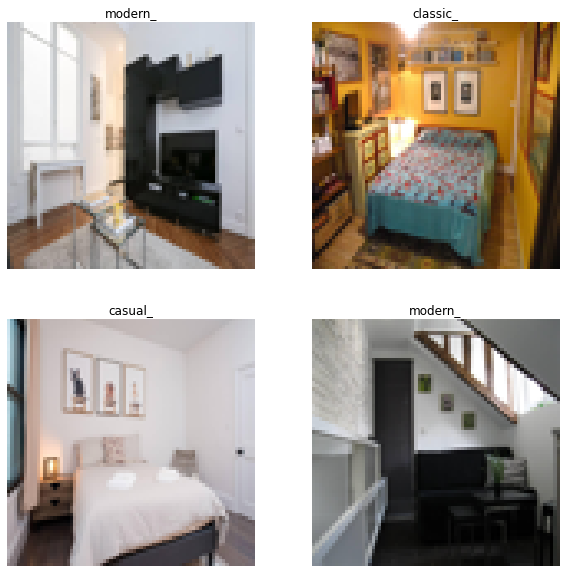

In [21]:
import random

def view_test(decoded_predictions,images):

    fig = plt.figure()
    fig.set_size_inches(10, 10, forward=True)
    rows=2
    cols=2
    index = [x for x in range(0, 556+1)]
    index = random.sample(index, 4)

    for i in range(4):
        ax = fig.add_subplot(rows,cols,i+1)
        ax.imshow((images[index[i]]*255).astype('uint8'))
        ax.set_title(decoded_predictions[index[i]][0])
        ax.axis("off")


view_test(decoded_predictions_train,train_images_style)

### 점수 평가

In [52]:
print(history.history['val_accuracy'])

[0.8651685118675232, 0.8735954761505127, 0.8623595237731934, 0.8735954761505127, 0.8735954761505127, 0.882022500038147, 0.9044944047927856, 0.9044944047927856, 0.8932584524154663, 0.8932584524154663]


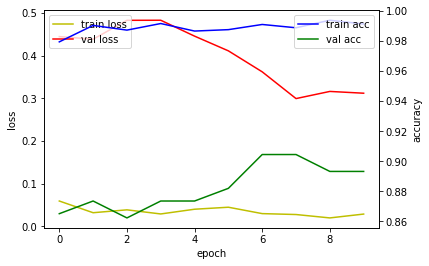

In [23]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

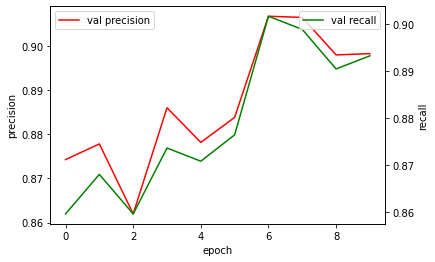

In [25]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

# loss_ax.plot(history.history['precision'], 'y', label='precision')
loss_ax.plot(history.history['val_precision'], 'r', label='val precision')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('precision')
loss_ax.legend(loc='upper left')

# acc_ax.plot(history.history['recall'], 'b', label='recall')
acc_ax.plot(history.history['val_recall'], 'g', label='val recall')
acc_ax.set_ylabel('recall')
acc_ax.legend(loc='upper right')

plt.show()

In [28]:
precision = history.history['val_precision']
recall = history.history['val_recall']

print(precision)
print(recall)

[0.8742856979370117, 0.8778409361839294, 0.8619718551635742, 0.8860399127006531, 0.8781869411468506, 0.8838527202606201, 0.9067796468734741, 0.9065155982971191, 0.8980169892311096, 0.8983050584793091]
[0.8595505356788635, 0.867977499961853, 0.8595505356788635, 0.8735954761505127, 0.8707864880561829, 0.8764045238494873, 0.9016854166984558, 0.898876428604126, 0.8904494643211365, 0.8932584524154663]


In [34]:
f1_score = []
for i in range(10):
    f1_score.append(2 * precision[i]*recall[i]/(precision[i]+recall[i]))
    
print(f1_score)

[0.8668555027609578, 0.8728813551026955, 0.8607594926295276, 0.8797736898545133, 0.8744710577867725, 0.8801128642361428, 0.9042253568668585, 0.9026798516107759, 0.8942172165699631, 0.8957746476243581]


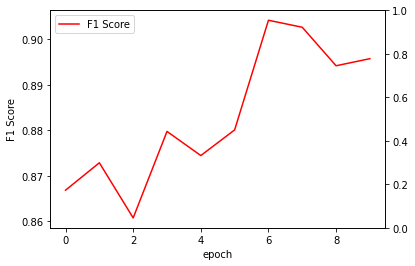

In [35]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

# loss_ax.plot(history.history['precision'], 'y', label='precision')
loss_ax.plot(f1_score, 'r', label='F1 Score')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('F1 Score')
loss_ax.legend(loc='upper left')

plt.show()

### Save Model

In [ ]:
import tensorflow as tf

#saved_model이라는 이름으로 해당 모델을 저장한다.
model.save("./saved_model/style_model")

### Load model

In [ ]:
from tensorflow import keras

reconstructed_model = keras.models.load_model("./saved_model/style_model")
with tf.device('/gpu:0'):
    predictions = reconstructed_model.predict(train_images_style)
    
    predictions = predictions.reshape(556, 4)
    
    decoded_predictions_train = enc.inverse_transform(predictions)
view_test(decoded_predictions_train,train_images_style)

## Factor Model

In [ ]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

groups_folder_path = './Dataset/Training_Data_factor'
categories = ["warm_", "cold_", "neutral_"]

print(len(categories))
nb_classes = len(categories) #카테고리갯수: 4개

image_w = 75 #이미지의 크기를 모두 통일해준다
image_h = 75

In [ ]:
X = []
Y = []

file_path = './Dataset/Training_Data_factor/'
file_names = os.listdir(file_path)
file_length = len(file_names)

for idx, cate in enumerate(categories):
    for num in range(1, file_length + 1):
        
        image_dir = groups_folder_path + "/" + cate + str(num)
        files = glob.glob(image_dir+".jpg")
        print(cate+str(num), " 파일 길이 : ", len(files))
        for i, f in enumerate(files):
            img = Image.open(f)      #폴더를 열어주고 이미지를 읽음
            img = img.convert("RGB")   #RGB로 바꿈
            img = img.resize((image_w, image_h)) #이미지 크기를 모두 학습시키기 쉽게 64x64크기고
            data = np.asarray(img) #숫자로

            X.append(data) #리스트에 추가 
            Y.append(cate)


X = np.array(X)
Y = np.array(Y)
#1 0 0 0 
#0 1 0 0 
print(Y)

# X_train, X_test, y_train, y_test = train_test_split(X, y) #데이터를 훈련셋과 시험셋으로 나눠주는 함수이용
# xy = (X_train, X_test, y_train, y_test)
np.save("./Dataset/Training_Data_factor/image_data_factor", X) #그렇게 xy를 multi_image_data.npy로 저장
np.save("./Dataset/Training_Data_factor/image_label_factor", Y) #그렇게 xy를 multi_image_data.npy로 저장

print(".npy file is created.", len(Y))

In [36]:
train_images_factor = np.load("./Dataset/Training_Data_factor/image_data_factor.npy", allow_pickle=True)
train_labels_factor = np.load("./Dataset/Training_Data_factor/image_label_factor.npy", allow_pickle=True)

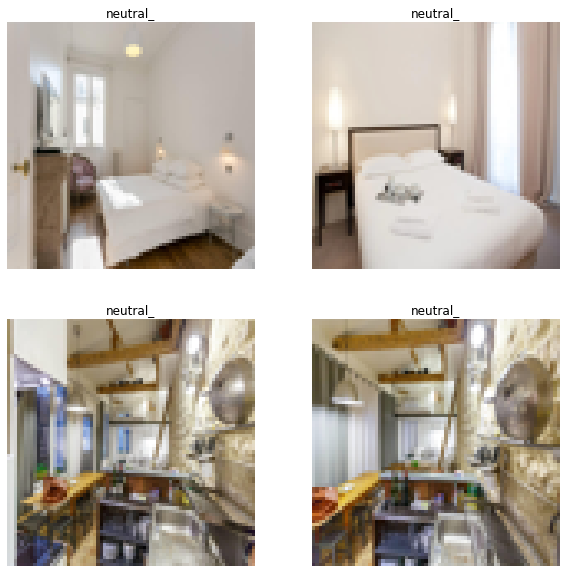

In [37]:
import matplotlib.pyplot as plt

def draw_img(train_images, train_labels,image_offset =1000):
    data_size = train_images.shape[0]
    if image_offset>= data_size-4:
        image_offset =data_size-4
    fig = plt.figure()
    fig.set_size_inches(10, 10, forward=True)
    rows=2
    cols=2

    for i in range(4):
        ax = fig.add_subplot(rows,cols,i+1)
        ax.imshow(train_images[image_offset+i])
        ax.set_title(train_labels[image_offset+i])
        ax.axis("off")

draw_img(train_images_factor, train_labels_factor, image_offset = 400)

In [38]:
train_size = train_images_factor.shape[0]
print("train data size is ", train_size)

train_images_factor = train_images_factor.reshape(train_size, 75, 75,3)
print(train_images_factor.shape)
train_images_factor = train_images_factor / 255.0

train data size is  556
(556, 75, 75, 3)


In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
                                    rotation_range=20, 
                                    zoom_range=0.2, 
                                    shear_range=0.7, 
                                    width_shift_range=0.2, 
                                    height_shift_range=0.2, 
                                    horizontal_flip=True, 
                                    vertical_flip=False)

Images after Augmentation :  3556
(75, 75, 3)


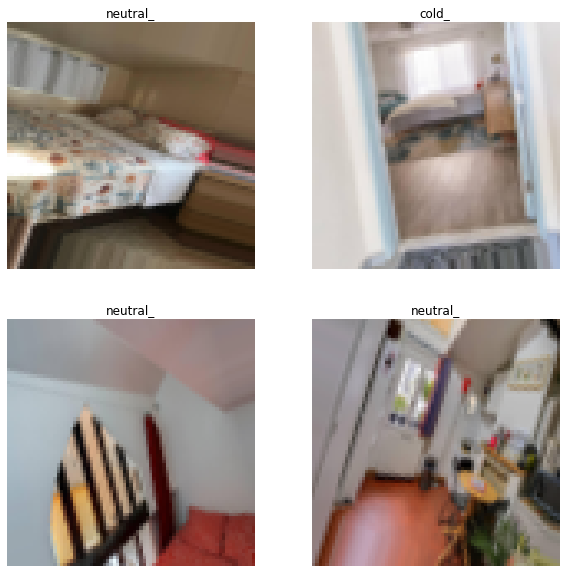

In [40]:
augment_size = 3000

rand_idx2 = np.random.randint(train_images_factor.shape[0], size=augment_size)
x_augmented = train_images_factor[rand_idx2].copy()
y_augmented = train_labels_factor[rand_idx2].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

# original data + augmented data
aug_train_images_factor = np.concatenate((train_images_factor, x_augmented))
aug_train_labels_factor = np.concatenate((train_labels_factor, y_augmented))

print('Images after Augmentation : ', aug_train_images_factor.shape[0])

assert aug_train_images_factor.shape[0]==train_images_factor.shape[0] + augment_size
assert aug_train_labels_factor.shape[0]==train_labels_factor.shape[0] + augment_size

index = 2500
data_size = aug_train_images_factor.shape[0]
if index>= data_size-4:
    index =data_size-4
fig = plt.figure()
fig.set_size_inches(10, 10, forward=True)
rows=2
cols=2
print(aug_train_images_factor[index].shape)
for i in range(4):
    ax = fig.add_subplot(rows,cols,i+1)
    ax.imshow((aug_train_images_factor[index+i]*255).astype('uint8'))
    ax.set_title(aug_train_labels_factor[index+i])
    ax.axis("off")

In [41]:
from sklearn.preprocessing import OneHotEncoder
enc= OneHotEncoder()
train_labels_new_factor = aug_train_labels_factor.reshape(-1,1)
enc.fit(train_labels_new_factor)

#changed the names through one-hot encoding.
aug_train_labels_factor_onehot = np.array(enc.transform(train_labels_new_factor).toarray())

print("one-hot encoding train shape is ", aug_train_labels_factor_onehot.shape)
print(aug_train_labels_factor_onehot)

print(aug_train_images_factor.shape[0])
aug_train_labels_factor_onehot = aug_train_labels_factor_onehot.reshape(aug_train_images_factor.shape[0], 1, 1, 3)

one-hot encoding train shape is  (3556, 3)
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]
3556


In [42]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras import layers


base_model = InceptionResNetV2(include_top=False,
                               weights='imagenet',
                               input_tensor=None,
                               input_shape=(75,75,3))
outputs = layers.Dense(3, activation='softmax')(base_model.output)

model2 = tf.keras.Model(base_model.input, outputs)

model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d_203 (Conv2D)            (None, 37, 37, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_203 (Batch  (None, 37, 37, 32)  96          ['conv2d_203[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_203 (Activation)    (None, 37, 37, 32)   0           ['batch_normalization_203[0

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_214 (Batch  (None, 7, 7, 64)    192         ['conv2d_214[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_208 (Activation)    (None, 7, 7, 96)     0           ['batch_normalization_208[0][0]']
                                                                                                  
 activation_210 (Activation)    (None, 7, 7, 64)     0           ['batch_normalization_210[0][0]']
                                                                                                  
 activation_213 (Activation)    (None, 7, 7, 96)     0           ['batch_normalization_213[0][0]']
          

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_225 (Batch  (None, 7, 7, 48)    144         ['conv2d_225[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_222 (Activation)    (None, 7, 7, 32)     0           ['batch_normalization_222[0][0]']
                                                                                                  
 activation_225 (Activation)    (None, 7, 7, 48)     0           ['batch_normalization_225[0][0]']
                                                                                                  
 conv2d_221 (Conv2D)            (None, 7, 7, 32)     10240       ['block35_1_ac[0][0]']           
          

 block35_3_mixed (Concatenate)  (None, 7, 7, 128)    0           ['activation_227[0][0]',         
                                                                  'activation_229[0][0]',         
                                                                  'activation_232[0][0]']         
                                                                                                  
 block35_3_conv (Conv2D)        (None, 7, 7, 320)    41280       ['block35_3_mixed[0][0]']        
                                                                                                  
 block35_3 (Lambda)             (None, 7, 7, 320)    0           ['block35_2_ac[0][0]',           
                                                                  'block35_3_conv[0][0]']         
                                                                                                  
 block35_3_ac (Activation)      (None, 7, 7, 320)    0           ['block35_3[0][0]']              
          

 activation_243 (Activation)    (None, 7, 7, 48)     0           ['batch_normalization_243[0][0]']
                                                                                                  
 conv2d_239 (Conv2D)            (None, 7, 7, 32)     10240       ['block35_4_ac[0][0]']           
                                                                                                  
 conv2d_241 (Conv2D)            (None, 7, 7, 32)     9216        ['activation_240[0][0]']         
                                                                                                  
 conv2d_244 (Conv2D)            (None, 7, 7, 64)     27648       ['activation_243[0][0]']         
                                                                                                  
 batch_normalization_239 (Batch  (None, 7, 7, 32)    96          ['conv2d_239[0][0]']             
 Normalization)                                                                                   
          

                                                                  'block35_6_conv[0][0]']         
                                                                                                  
 block35_6_ac (Activation)      (None, 7, 7, 320)    0           ['block35_6[0][0]']              
                                                                                                  
 conv2d_254 (Conv2D)            (None, 7, 7, 32)     10240       ['block35_6_ac[0][0]']           
                                                                                                  
 batch_normalization_254 (Batch  (None, 7, 7, 32)    96          ['conv2d_254[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_254 (Activation)    (None, 7, 7, 32)     0           ['batch_normalization_254[0][0]']
          

                                                                                                  
 batch_normalization_257 (Batch  (None, 7, 7, 32)    96          ['conv2d_257[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_259 (Batch  (None, 7, 7, 32)    96          ['conv2d_259[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_262 (Batch  (None, 7, 7, 64)    192         ['conv2d_262[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 Normalization)                                                                                   
                                                                                                  
 activation_272 (Activation)    (None, 7, 7, 32)     0           ['batch_normalization_272[0][0]']
                                                                                                  
 conv2d_270 (Conv2D)            (None, 7, 7, 32)     10240       ['block35_9_ac[0][0]']           
                                                                                                  
 conv2d_273 (Conv2D)            (None, 7, 7, 48)     13824       ['activation_272[0][0]']         
                                                                                                  
 batch_normalization_270 (Batch  (None, 7, 7, 32)    96          ['conv2d_270[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_280 (Conv2D)            (None, 3, 3, 128)    139264      ['mixed_6a[0][0]']               
                                                                                                  
 batch_normalization_280 (Batch  (None, 3, 3, 128)   384         ['conv2d_280[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_280 (Activation)    (None, 3, 3, 128)    0           ['batch_normalization_280[0][0]']
                                                                                                  
 conv2d_281 (Conv2D)            (None, 3, 3, 160)    143360      ['activation_280[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_289 (Conv2D)            (None, 3, 3, 160)    143360      ['activation_288[0][0]']         
                                                                                                  
 batch_normalization_289 (Batch  (None, 3, 3, 160)   480         ['conv2d_289[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_289 (Activation)    (None, 3, 3, 160)    0           ['batch_normalization_289[0][0]']
                                                                                                  
 conv2d_287 (Conv2D)            (None, 3, 3, 192)    208896      ['block17_2_ac[0][0]']           
                                                                                                  
 conv2d_29

                                                                                                  
 conv2d_295 (Conv2D)            (None, 3, 3, 192)    208896      ['block17_4_ac[0][0]']           
                                                                                                  
 conv2d_298 (Conv2D)            (None, 3, 3, 192)    215040      ['activation_297[0][0]']         
                                                                                                  
 batch_normalization_295 (Batch  (None, 3, 3, 192)   576         ['conv2d_295[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_298 (Batch  (None, 3, 3, 192)   576         ['conv2d_298[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 batch_normalization_306 (Batch  (None, 3, 3, 192)   576         ['conv2d_306[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_303 (Activation)    (None, 3, 3, 192)    0           ['batch_normalization_303[0][0]']
                                                                                                  
 activation_306 (Activation)    (None, 3, 3, 192)    0           ['batch_normalization_306[0][0]']
                                                                                                  
 block17_7_mixed (Concatenate)  (None, 3, 3, 384)    0           ['activation_303[0][0]',         
                                                                  'activation_306[0][0]']         
          

                                                                                                  
 block17_9_mixed (Concatenate)  (None, 3, 3, 384)    0           ['activation_311[0][0]',         
                                                                  'activation_314[0][0]']         
                                                                                                  
 block17_9_conv (Conv2D)        (None, 3, 3, 1088)   418880      ['block17_9_mixed[0][0]']        
                                                                                                  
 block17_9 (Lambda)             (None, 3, 3, 1088)   0           ['block17_8_ac[0][0]',           
                                                                  'block17_9_conv[0][0]']         
                                                                                                  
 block17_9_ac (Activation)      (None, 3, 3, 1088)   0           ['block17_9[0][0]']              
          

                                                                  'block17_11_conv[0][0]']        
                                                                                                  
 block17_11_ac (Activation)     (None, 3, 3, 1088)   0           ['block17_11[0][0]']             
                                                                                                  
 conv2d_324 (Conv2D)            (None, 3, 3, 128)    139264      ['block17_11_ac[0][0]']          
                                                                                                  
 batch_normalization_324 (Batch  (None, 3, 3, 128)   384         ['conv2d_324[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_324 (Activation)    (None, 3, 3, 128)    0           ['batch_normalization_324[0][0]']
          

 Normalization)                                                                                   
                                                                                                  
 activation_332 (Activation)    (None, 3, 3, 128)    0           ['batch_normalization_332[0][0]']
                                                                                                  
 conv2d_333 (Conv2D)            (None, 3, 3, 160)    143360      ['activation_332[0][0]']         
                                                                                                  
 batch_normalization_333 (Batch  (None, 3, 3, 160)   480         ['conv2d_333[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_333 (Activation)    (None, 3, 3, 160)    0           ['batch_normalization_333[0][0]']
          

 Normalization)                                                                                   
                                                                                                  
 activation_341 (Activation)    (None, 3, 3, 160)    0           ['batch_normalization_341[0][0]']
                                                                                                  
 conv2d_339 (Conv2D)            (None, 3, 3, 192)    208896      ['block17_15_ac[0][0]']          
                                                                                                  
 conv2d_342 (Conv2D)            (None, 3, 3, 192)    215040      ['activation_341[0][0]']         
                                                                                                  
 batch_normalization_339 (Batch  (None, 3, 3, 192)   576         ['conv2d_339[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 batch_normalization_347 (Batch  (None, 3, 3, 192)   576         ['conv2d_347[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_350 (Batch  (None, 3, 3, 192)   576         ['conv2d_350[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_347 (Activation)    (None, 3, 3, 192)    0           ['batch_normalization_347[0][0]']
                                                                                                  
 activation_350 (Activation)    (None, 3, 3, 192)    0           ['batch_normalization_350[0][0]']
          

 activation_355 (Activation)    (None, 3, 3, 192)    0           ['batch_normalization_355[0][0]']
                                                                                                  
 activation_358 (Activation)    (None, 3, 3, 192)    0           ['batch_normalization_358[0][0]']
                                                                                                  
 block17_20_mixed (Concatenate)  (None, 3, 3, 384)   0           ['activation_355[0][0]',         
                                                                  'activation_358[0][0]']         
                                                                                                  
 block17_20_conv (Conv2D)       (None, 3, 3, 1088)   418880      ['block17_20_mixed[0][0]']       
                                                                                                  
 block17_20 (Lambda)            (None, 3, 3, 1088)   0           ['block17_19_ac[0][0]',          
          

                                                                                                  
 conv2d_366 (Conv2D)            (None, 1, 1, 192)    399360      ['mixed_7a[0][0]']               
                                                                                                  
 conv2d_369 (Conv2D)            (None, 1, 1, 256)    172032      ['activation_368[0][0]']         
                                                                                                  
 batch_normalization_366 (Batch  (None, 1, 1, 192)   576         ['conv2d_366[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_369 (Batch  (None, 1, 1, 256)   768         ['conv2d_369[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 batch_normalization_377 (Batch  (None, 1, 1, 256)   768         ['conv2d_377[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_374 (Activation)    (None, 1, 1, 192)    0           ['batch_normalization_374[0][0]']
                                                                                                  
 activation_377 (Activation)    (None, 1, 1, 256)    0           ['batch_normalization_377[0][0]']
                                                                                                  
 block8_3_mixed (Concatenate)   (None, 1, 1, 448)    0           ['activation_374[0][0]',         
                                                                  'activation_377[0][0]']         
          

                                                                                                  
 block8_5_mixed (Concatenate)   (None, 1, 1, 448)    0           ['activation_382[0][0]',         
                                                                  'activation_385[0][0]']         
                                                                                                  
 block8_5_conv (Conv2D)         (None, 1, 1, 2080)   933920      ['block8_5_mixed[0][0]']         
                                                                                                  
 block8_5 (Lambda)              (None, 1, 1, 2080)   0           ['block8_4_ac[0][0]',            
                                                                  'block8_5_conv[0][0]']          
                                                                                                  
 block8_5_ac (Activation)       (None, 1, 1, 2080)   0           ['block8_5[0][0]']               
          

                                                                  'block8_7_conv[0][0]']          
                                                                                                  
 block8_7_ac (Activation)       (None, 1, 1, 2080)   0           ['block8_7[0][0]']               
                                                                                                  
 conv2d_395 (Conv2D)            (None, 1, 1, 192)    399360      ['block8_7_ac[0][0]']            
                                                                                                  
 batch_normalization_395 (Batch  (None, 1, 1, 192)   576         ['conv2d_395[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_395 (Activation)    (None, 1, 1, 192)    0           ['batch_normalization_395[0][0]']
          

 Normalization)                                                                                   
                                                                                                  
 activation_403 (Activation)    (None, 1, 1, 192)    0           ['batch_normalization_403[0][0]']
                                                                                                  
 conv2d_404 (Conv2D)            (None, 1, 1, 224)    129024      ['activation_403[0][0]']         
                                                                                                  
 batch_normalization_404 (Batch  (None, 1, 1, 224)   672         ['conv2d_404[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_404 (Activation)    (None, 1, 1, 224)    0           ['batch_normalization_404[0][0]']
          

In [43]:
with tf.device('/gpu:0'):
    model2.compile(optimizer='SGD',
                loss='categorical_crossentropy',
                metrics=['accuracy'\
                          ,tf.keras.metrics.Precision(name='precision')\
                          ,tf.keras.metrics.Recall(name='recall')\
                          ,tf.keras.metrics.FalsePositives(name='false_positives')\
                          ,tf.keras.metrics.FalseNegatives(name='false_negatives')]
               )
    batch_size = 8

    history2 = model2.fit(aug_train_images_factor, aug_train_labels_factor_onehot, batch_size=batch_size, epochs=13, verbose=1, validation_split=0.1)

Epoch 1/13
400/400 [==============================] - 60s 128ms/step - loss: 1.0468 - accuracy: 0.5728 - precision: 0.5954 - recall: 0.5266 - false_positives: 1145.0000 - false_negatives: 1515.0000 - val_loss: 5.6454 - val_accuracy: 0.6320 - val_precision: 0.6284 - val_recall: 0.5843 - val_false_positives: 123.0000 - val_false_negatives: 148.0000
Epoch 2/13
400/400 [==============================] - 49s 123ms/step - loss: 0.6200 - accuracy: 0.7359 - precision: 0.7550 - recall: 0.7134 - false_positives: 741.0000 - false_negatives: 917.0000 - val_loss: 3.2590 - val_accuracy: 0.6742 - val_precision: 0.6879 - val_recall: 0.6376 - val_false_positives: 103.0000 - val_false_negatives: 129.0000
Epoch 3/13
400/400 [==============================] - 49s 123ms/step - loss: 0.4001 - accuracy: 0.8509 - precision: 0.8614 - recall: 0.8391 - false_positives: 432.0000 - false_negatives: 515.0000 - val_loss: 0.5926 - val_accuracy: 0.7725 - val_precision: 0.7797 - val_recall: 0.7556 - val_false_positives

In [44]:
aug_train_labels_factor_onehot = aug_train_labels_factor_onehot.reshape(aug_train_images_style.shape[0], 3)

In [45]:
with tf.device('/gpu:0'):
    
    predictions = model2.predict(train_images_factor)
    print(predictions.shape)
    predictions = predictions.reshape(556, 3)
    print(predictions.shape)
    decoded_predictions_train = enc.inverse_transform(predictions)

(556, 1, 1, 3)
(556, 3)


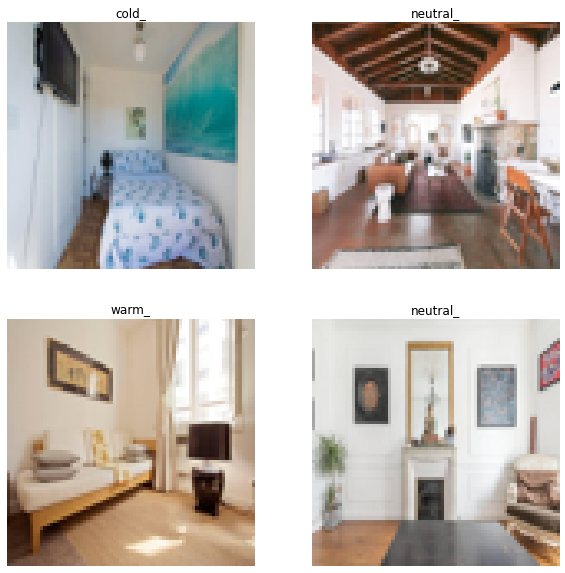

In [55]:
import random

def view_test(decoded_predictions,images):

    fig = plt.figure()
    fig.set_size_inches(10, 10, forward=True)
    rows=2
    cols=2
    index = [x for x in range(0, 556+1)]
    index = random.sample(index, 4)

    for i in range(4):
        ax = fig.add_subplot(rows,cols,i+1)
        ax.imshow((images[index[i]]*255).astype('uint8'))
        ax.set_title(decoded_predictions[index[i]][0])
        ax.axis("off")


view_test(decoded_predictions_train,train_images_factor)

### 점수 평가

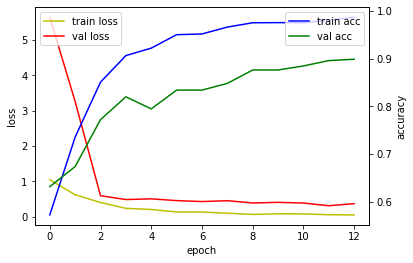

In [47]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history2.history['loss'], 'y', label='train loss')
loss_ax.plot(history2.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history2.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history2.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

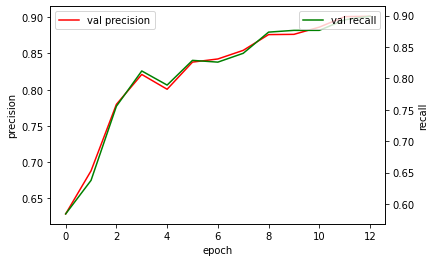

In [48]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

# loss_ax.plot(history.history['precision'], 'y', label='precision')
loss_ax.plot(history2.history['val_precision'], 'r', label='val precision')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('precision')
loss_ax.legend(loc='upper left')

# acc_ax.plot(history.history['recall'], 'b', label='recall')
acc_ax.plot(history2.history['val_recall'], 'g', label='val recall')
acc_ax.set_ylabel('recall')
acc_ax.legend(loc='upper right')

plt.show()

In [49]:
precision = history2.history['val_precision']
recall = history2.history['val_recall']

print(precision)
print(recall)

[0.6283987760543823, 0.6878787875175476, 0.7797101736068726, 0.8210227489471436, 0.8005697727203369, 0.8380681872367859, 0.8424068689346313, 0.854285717010498, 0.8760563135147095, 0.8764045238494873, 0.8863636255264282, 0.9008498787879944, 0.9014084339141846]
[0.584269642829895, 0.6376404762268066, 0.7556179761886597, 0.8117977380752563, 0.7893258333206177, 0.8286516666412354, 0.8258426785469055, 0.8398876190185547, 0.8735954761505127, 0.8764045238494873, 0.8764045238494873, 0.8932584524154663, 0.898876428604126]


In [50]:
f1_score = []
for i in range(13):
    f1_score.append(2 * precision[i]*recall[i]/(precision[i]+recall[i]))
    
print(f1_score)

[0.6055312775075641, 0.6618075944365929, 0.7674750488656064, 0.816384184055717, 0.794908043751773, 0.8333333265298536, 0.8340425401194211, 0.8470254861916937, 0.8748241642824043, 0.8764045238494873, 0.8813559417465251, 0.8970381047671176, 0.9001406506934727]


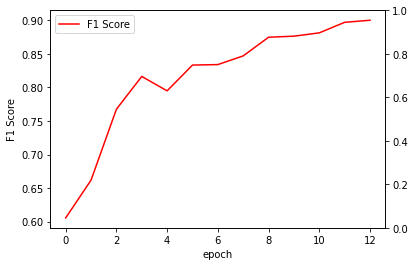

In [51]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

# loss_ax.plot(history.history['precision'], 'y', label='precision')
loss_ax.plot(f1_score, 'r', label='F1 Score')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('F1 Score')
loss_ax.legend(loc='upper left')

plt.show()

### Save Model

In [ ]:
import tensorflow as tf

#saved_model이라는 이름으로 해당 모델을 저장한다.
model2.save("./saved_model/factor_model")